In [51]:
import wfdb
import os
import pandas as pd
import scipy
from biosppy.signals import ecg
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display
import wfdb.processing as wp

In [12]:
# File handling

with open("mit-bih-normal-sinus-rhythm-database-1.0.0/RECORDS") as f:
    content = f.read()

root_directory = "mit-bih-normal-sinus-rhythm-database-1.0.0"

In [13]:
# Data Creation

split_lines = content.splitlines()
nsr_signals = {}

[   1    3   14 ... 4993 4994 4998]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x145ea5c30>>


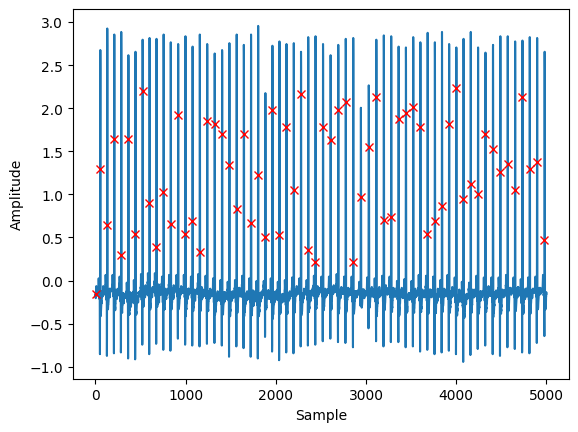

[       1       52      129 ... 10247715 10247823 10247936]
[   3    6   10 ... 4983 4997 4998]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x145532e30>>


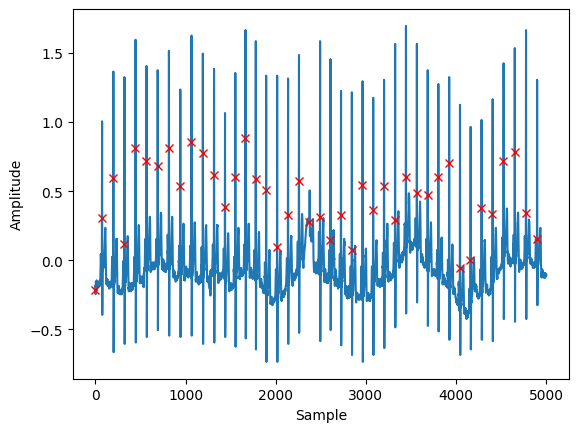

[       1       73      199 ... 10802593 10802693 10802777]
[   5    7   11 ... 4992 4993 4994]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x1455fef20>>


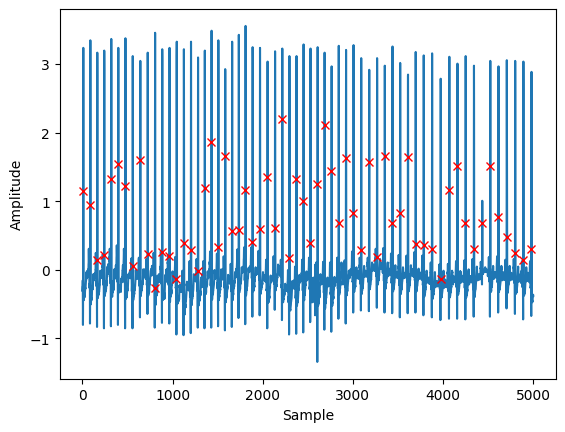

[      9      87     164 ... 9516519 9516612 9516699]
[   9   10   24 ... 4987 4988 4995]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x127cc39d0>>


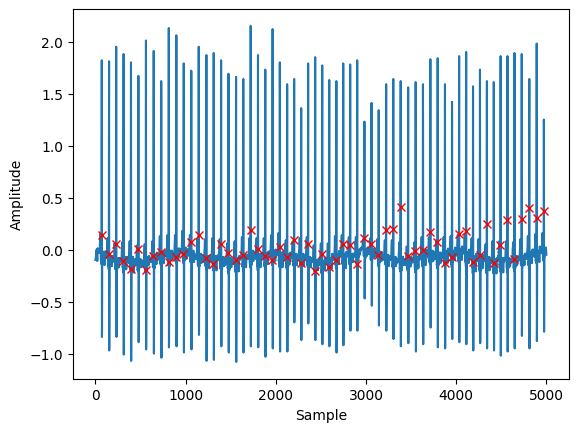

[     68     148     228 ... 9953381 9953468 9953510]
[   2    3    7 ... 4995 4996 4998]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x126dead10>>


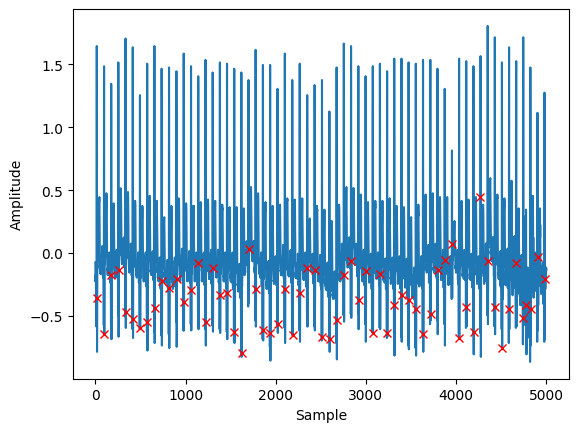

[     18      99     178 ... 9740551 9740634 9740719]
[  17   40   41 ... 4989 4993 4996]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x12729f730>>


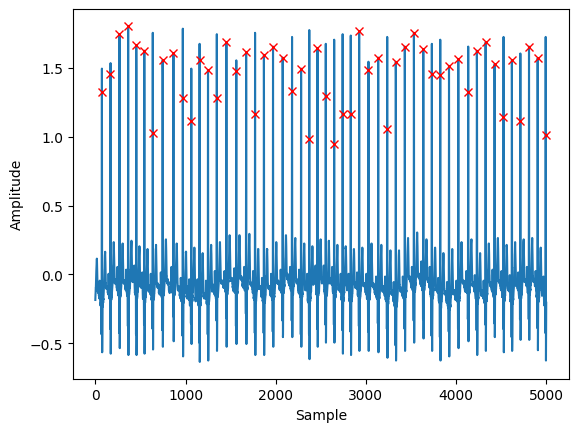

[      72      168      268 ... 10837587 10837734 10837764]
[   7    9   10 ... 4988 4993 4996]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x127abdb10>>


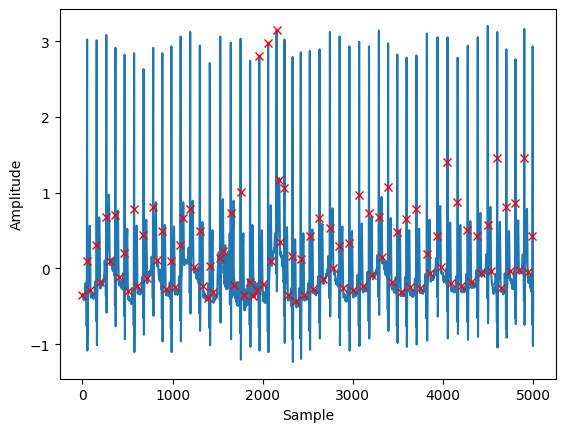

[       1       50       90 ... 10002106 10002148 10002201]
[   1    2   17 ... 4991 4994 4995]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x127c102e0>>


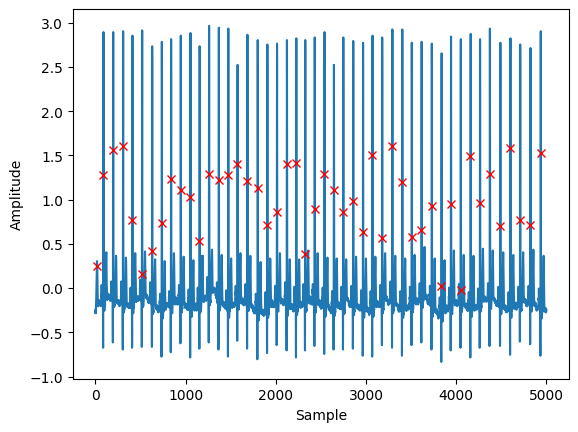

[      16       87      195 ... 10758439 10758536 10758639]
[   1    3    4 ... 4994 4996 4997]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x1275cca60>>


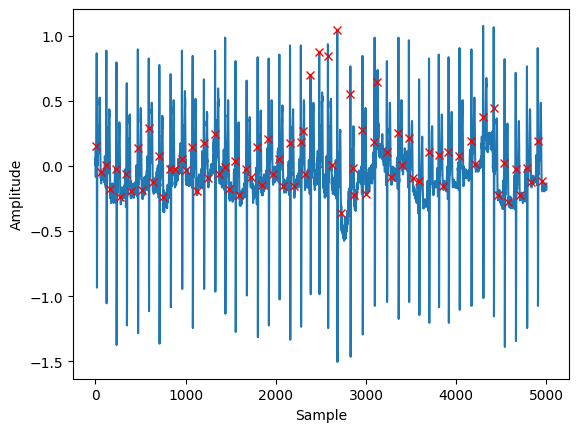

[     11      58     118 ... 9567523 9567587 9567651]
[   1    2    3 ... 4991 4997 4998]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x12811ee90>>


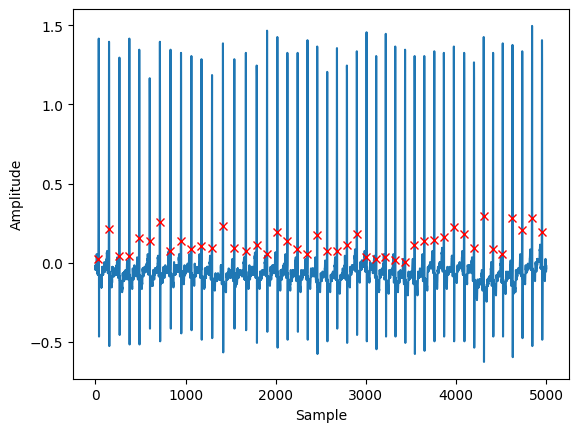

[     35     150     264 ... 9779088 9779185 9779269]
[   1    4   17 ... 4985 4988 4994]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x1503df580>>


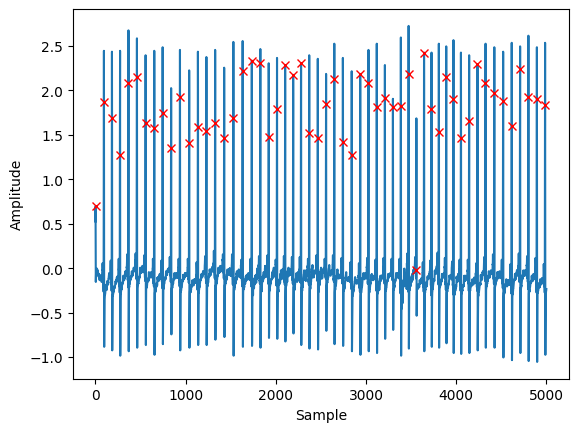

[      1      93     182 ... 9533641 9533735 9533793]
[   3    4   27   52   55   59   92   93  109  117  118  121  123  130
  131  153  164  168  169  189  192  195  201  221  230  245  257  260
  263  267  271  272  324  327  335  356  371  381  388  392  396  399
  424  433  434  446  455  460  463  466  471  473  481  482  491  500
  501  504  505  506  507  523  525  527  530  533  536  539  560  569
  570  571  575  583  595  598  602  610  611  626  642  651  663  666
  669  673  676  677  678  683  684  703  706  707  708  710  711  718
  719  720  727  729  731  734  737  741  742  746  775  778  797  798
  801  804  807  818  819  833  842  843  844  845  847  848  849  868
  870  874  877  883  884  886  887  889  890  901  913  914  917  919
  934  935  939  942  946  979  980  988 1004 1005 1008 1011 1014 1018
 1038 1039 1040 1074 1076 1079 1082 1108 1124 1131 1132 1133 1140 1142
 1145 1148 1151 1155 1156 1161 1162 1176 1184 1185 1200 1207 1208 1212
 1215 1219 1225 1226 12

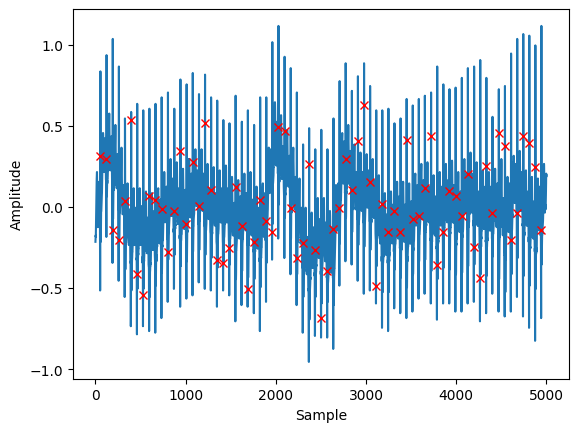

[      54      122      190 ... 10377129 11169423 11178268]
[   1    2    4 ... 4995 4997 4998]
<bound method Annotation.rm_attributes of <wfdb.io.annotation.Annotation object at 0x1275b8f40>>


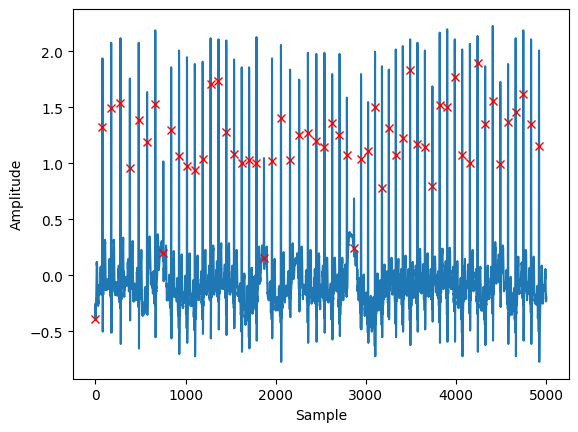

[      1      78     175 ... 9639200 9639344 9639488]
[  36   46   47  100  164  228  292  356  420  432  433  484  548  612
  676  740  743  744  804  809  810  815  868  932  996 1060 1064 1065
 1124 1188 1252 1316 1357 1358 1380 1444 1508 1572 1636 1642 1643 1700
 1706 1764 1828 1833 1892 1956 2020 2084 2148 2212 2219 2276 2282 2283
 2340 2353 2354 2404 2468 2532 2596 2660 2670 2671 2724 2729 2730 2788
 2852 2916 2980 2989 2990 3044 3108 3172 3175 3176 3236 3300 3304 3305
 3364 3427 3434 3435 3492 3556 3684 3748 3812 3876 3940 3964 3965 4004
 4068 4132 4139 4196 4260 4264 4271 4274 4297 4369 4408 4410 4484 4496
 4499 4536 4551 4572 4584 4587 4625 4634 4635 4640 4653 4658 4660 4661
 4665 4666 4670 4672 4714 4715 4719 4721 4733 4734 4736 4738 4739 4745
 4746 4749 4750 4751 4752 4755 4758 4761 4795 4798 4803 4805 4811 4812
 4816 4820 4821 4835 4840 4843 4889 4890 4893 4908 4909 4910 4915 4916
 4917 4922 4923 4927 4930 4934 4935 4936 4954 4976 4977 4978 4979 4987
 4988 4994 4995]
<bound

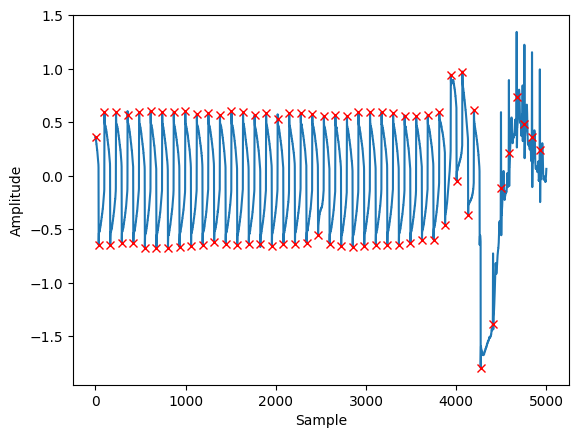

[      1      36     100 ... 9294409 9294493 9294532]
[  10   75   79   80  139  142  143  203  267  331  394  459  523  587
  651  715  779  840  841  843  851  852  906  971 1032 1033 1035 1074
 1075 1096 1097 1099 1163 1227 1288 1289 1355 1360 1419 1480 1481 1483
 1547 1610 1675 1686 1687 1739 1803 1867 1931 1934 1935 1995 1999 2000
 2059 2123 2187 2251 2257 2258 2315 2379 2443 2507 2571 2578 2579 2635
 2643 2644 2696 2697 2699 2761 2762 2763 2770 2827 2891 2955 3019 3083
 3145 3146 3147 3153 3211 3222 3223 3275 3339 3403 3467 3472 3473 3531
 3595 3659 3723 3747 3748 3760 3761 3784 3785 3787 3799 3808 3823 3824
 3828 3829 3851 3915 3979 4043 4076 4082 4083 4084 4085 4086 4089 4092
 4094 4097 4098 4099 4100 4102 4103 4110 4115 4117 4131 4132 4133 4138
 4139 4145 4147 4148 4150 4154 4156 4157 4168 4171 4174 4177 4179 4181
 4182 4186 4187 4190 4191 4195 4198 4199 4203 4208 4209 4212 4213 4215
 4217 4221 4223 4224 4227 4230 4231 4238 4239 4241 4249 4250 4251 4252
 4255 4259 4261 4264 42

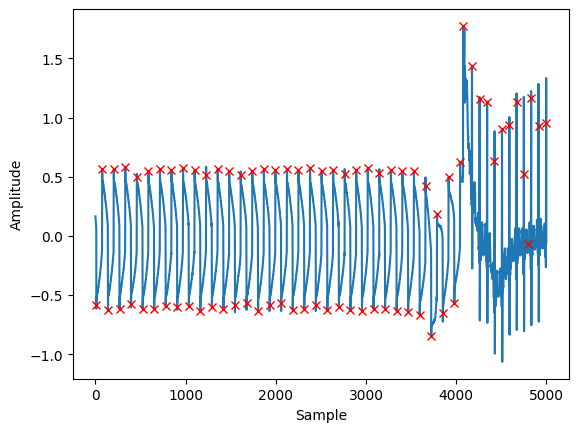

[     11      75     139 ... 8861856 8861963 8862027]
[  42   43   61  125  189  244  245  253  317  381  445  509  573  637
  701  765  806  807  829  891  892  893  955  956  957 1021 1085 1112
 1113 1149 1213 1277 1341 1389 1390 1403 1404 1405 1467 1468 1469 1533
 1570 1571 1597 1659 1660 1661 1725 1789 1851 1852 1853 1917 1946 1947
 1981 2045 2090 2091 2109 2173 2237 2301 2363 2364 2365 2417 2418 2429
 2493 2557 2621 2683 2684 2685 2749 2813 2877 2941 3005 3067 3068 3069
 3126 3127 3133 3197 3222 3223 3261 3295 3296 3313 3314 3325 3389 3397
 3401 3409 3410 3416 3417 3426 3427 3430 3432 3461 3492 3531 3532 3533
 3537 3538 3540 3549 3552 3554 3595 3609 3612 3615 3616 3619 3620 3622
 3623 3641 3642 3646 3647 3649 3654 3655 3662 3664 3667 3669 3737 3738
 3739 3744 3745 3750 3754 3761 3762 3778 3782 3784 3811 3830 3831 3839
 3851 3859 3865 3877 3890 3892 3895 3897 3925 3940 3962 3965 3969 3970
 3977 3978 3987 3988 3989 3991 3992 3993 3996 3997 3998 3999 4001 4007
 4008 4012 4014 4037 40

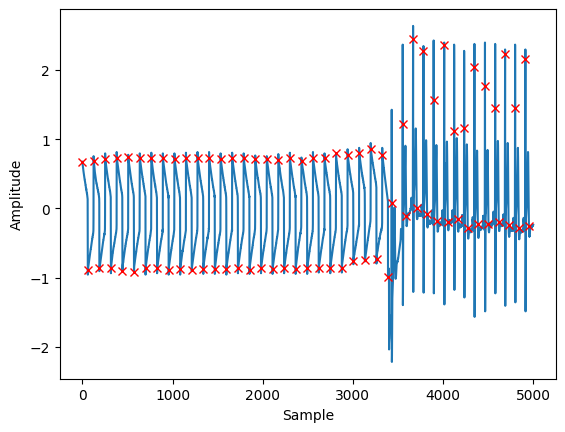

[      1      62     126 ... 9246183 9246278 9246306]
[  14   15   21   82   83  146  147  148  213  277  338  339  340  405
  469  530  531  532  597  661  725  789  853  917  952  953  981 1045
 1109 1173 1237 1301 1346 1347 1365 1429 1493 1546 1547 1557 1621 1685
 1708 1709 1749 1813 1877 1941 2005 2069 2111 2112 2133 2197 2261 2274
 2275 2325 2381 2382 2389 2451 2452 2453 2517 2581 2645 2709 2773 2837
 2851 2852 2901 2965 3029 3093 3157 3221 3257 3258 3283 3284 3285 3349
 3413 3475 3476 3477 3541 3603 3604 3605 3667 3668 3669 3733 3795 3796
 3797 3855 3856 3871 3873 3902 3910 3949 3953 3954 3956 3957 3970 3972
 3974 3981 3982 3999 4008 4012 4013 4015 4016 4021 4022 4027 4031 4037
 4038 4040 4041 4044 4053 4059 4060 4064 4066 4069 4093 4105 4108 4109
 4126 4132 4143 4149 4153 4155 4157 4193 4194 4195 4198 4199 4204 4210
 4211 4212 4213 4216 4217 4218 4225 4233 4240 4241 4246 4248 4250 4252
 4253 4254 4261 4262 4275 4288 4289 4290 4295 4296 4297 4298 4312 4323
 4337 4343 4346 4349 43

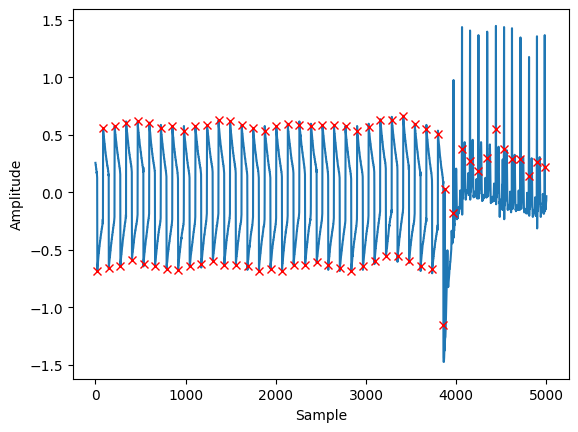

[     21      85     149 ... 9220843 9220939 9220988]
[  26   27  112  176  240  282  283  305  339  340  368  376  377  410
  411  497  514  515  545  560  624  688  727  728  743  744  752  800
  801  816  944  995  996 1072 1136 1200 1203 1204 1264 1328 1392 1456
 1520 1570 1571 1584 1631 1632 1635 1636 1648 1700 1701 1713 1776 1840
 1859 1860 1904 1954 1955 1968 1995 1996 2007 2008 2032 2090 2091 2096
 2129 2130 2160 2224 2251 2252 2275 2276 2288 2352 2379 2380 2416 2480
 2544 2587 2615 2616 2631 2655 2656 2672 2718 2719 2736 2739 2740 2811
 2814 2815 2818 2819 2848 2849 2850 2851 2852 2853 2854 2855 2859 2864
 2877 2878 2885 2896 2900 2901 2904 2912 2913 2914 2915 2936 2937 2941
 2943 2952 2953 2974 2975 2976 2979 2981 2982 2983 2989 2990 2994 2995
 3000 3001 3003 3004 3007 3009 3011 3012 3014 3015 3018 3021 3022 3023
 3025 3026 3027 3028 3030 3031 3033 3034 3035 3036 3037 3038 3042 3043
 3045 3046 3047 3048 3051 3054 3055 3057 3058 3060 3061 3062 3064 3065
 3069 3070 3072 3073 30

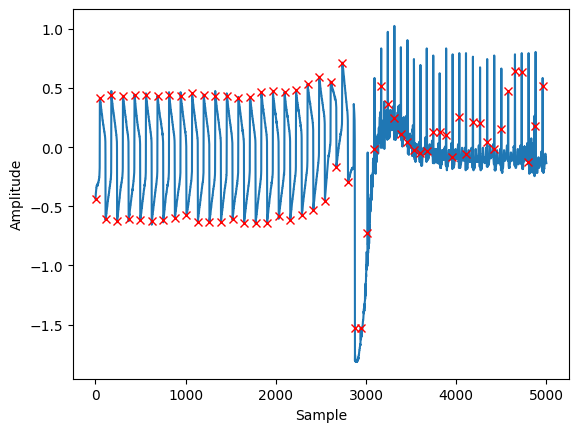

[      1      49     113 ... 9723388 9723469 9723523]


In [80]:
from wfdb.processing import find_peaks

def get_rr_peaks(all_recordings, lines):

    fs = 128
    rri = []

    for line in lines:

        path = os.path.join(root_directory, line)
        current_recording = wfdb.rdrecord(path)
        record = wfdb.rdrecord(path, sampfrom=0, sampto=5000, channels=[0])
        rpeaks, _ = find_peaks(record.p_signal[:,0])
        print(rpeaks)
        annotation = wfdb.rdann(path, 'atr') # Load the ECG annotation
        print(annotation.rm_attributes)
        r_peaks = annotation.sample # Extract R-peak positions
        r_peaks_in_range = r_peaks[r_peaks < len(record.p_signal)] # Only keep R-peaks within the record signal range

        plt.plot(record.p_signal)
        plt.plot(r_peaks_in_range, record.p_signal[r_peaks_in_range,0], 'rx')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.show()
        print(r_peaks)
        rri.append(1000*np.diff(r_peaks)/128)

    return rri




rr_intervals = get_rr_peaks(nsr_signals, split_lines)

In [57]:
print(rr_intervals)

[array([398.4375, 601.5625, 609.375 , ..., 796.875 , 843.75  , 882.8125]), array([562.5  , 984.375, 953.125, ..., 796.875, 781.25 , 656.25 ]), array([609.375 , 601.5625, 601.5625, ..., 695.3125, 726.5625, 679.6875]), array([625.    , 625.    , 632.8125, ..., 703.125 , 679.6875, 328.125 ]), array([632.8125, 617.1875, 617.1875, ..., 664.0625, 648.4375, 664.0625]), array([ 750.    ,  781.25  ,  750.    , ...,  859.375 , 1148.4375,
        234.375 ]), array([382.8125, 312.5   , 515.625 , ..., 609.375 , 328.125 , 414.0625]), array([554.6875, 843.75  , 859.375 , ..., 781.25  , 757.8125, 804.6875]), array([367.1875, 468.75  , 359.375 , ..., 500.    , 500.    , 500.    ]), array([898.4375, 890.625 , 859.375 , ..., 789.0625, 757.8125, 656.25  ]), array([718.75  , 695.3125, 695.3125, ..., 710.9375, 734.375 , 453.125 ]), array([5.31250000e+02, 5.31250000e+02, 5.31250000e+02, ...,
       1.67609375e+05, 6.18979688e+06, 6.91015625e+04]), array([ 601.5625,  757.8125,  804.6875, ..., 6617.1875, 1125.

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


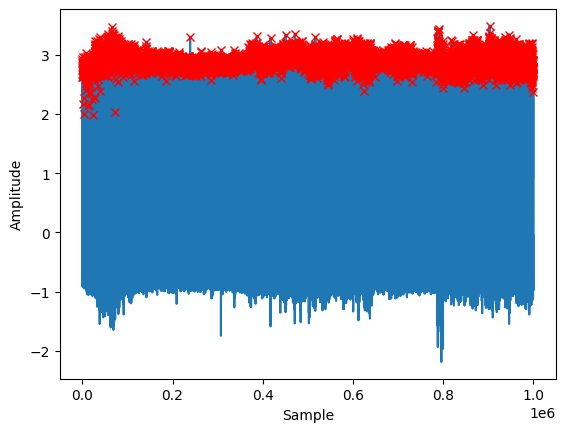

[    54    131    209 ... 999787 999866 999940]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


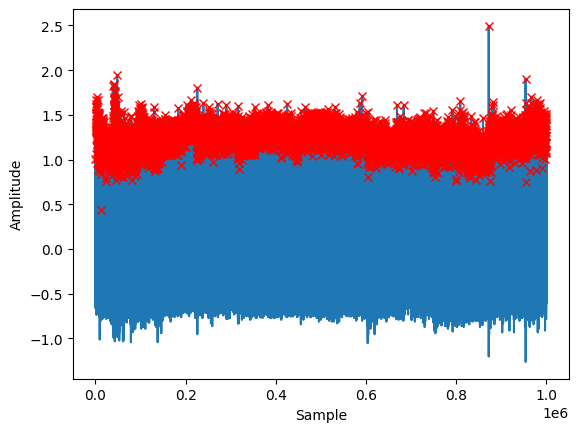

[    74    200    322 ... 999675 999801 999930]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


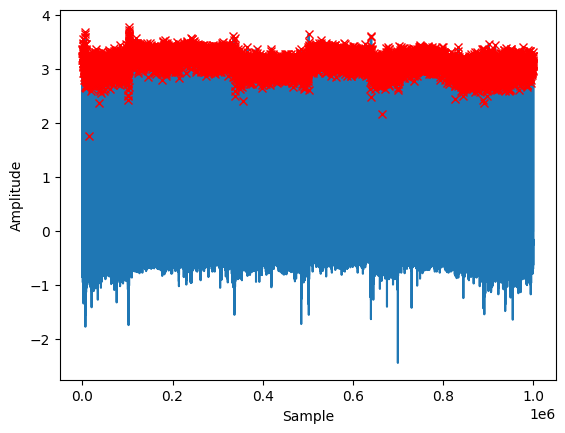

[    89    166    243 ... 999707 999813 999920]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


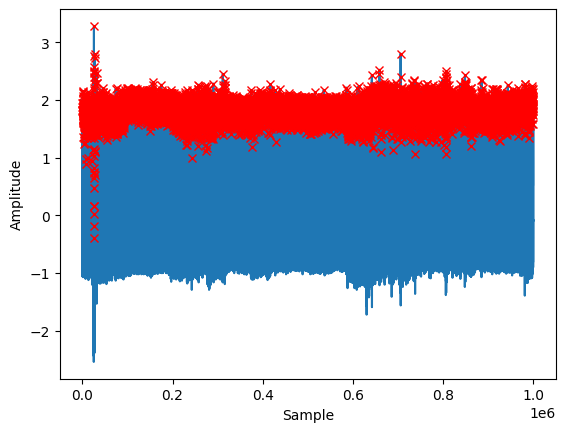

[    69    150    229 ... 999720 999824 999929]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


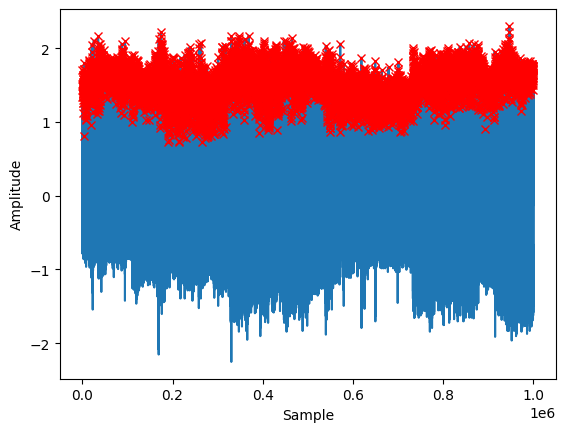

[    16     96    176 ... 999831 999909 999988]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


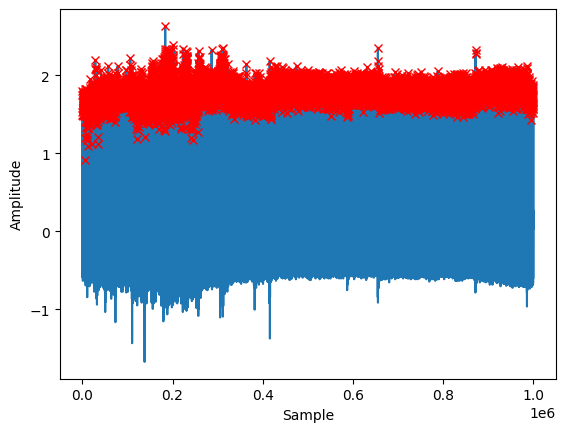

[    72    168    268 ... 999738 999859 999972]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


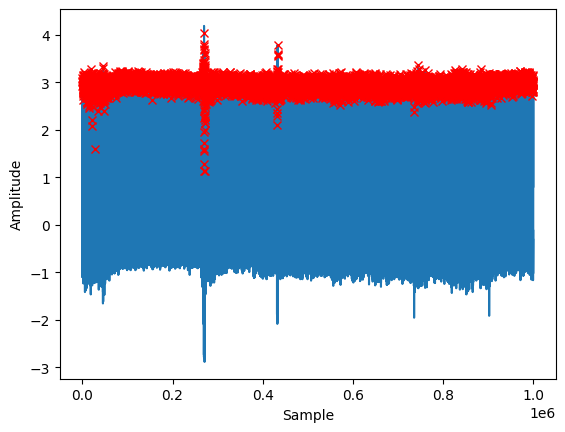

[    52    158    265 ... 999706 999805 999908]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


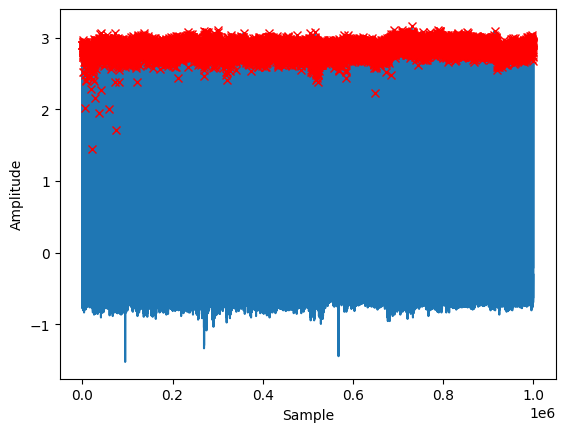

[    89    197    307 ... 999699 999815 999933]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


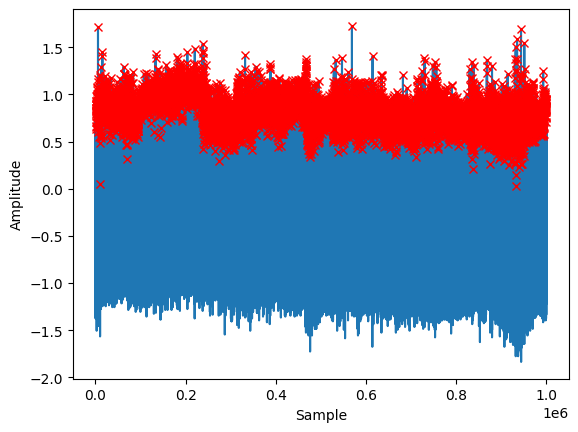

[    12    119    155 ... 999783 999879 999957]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


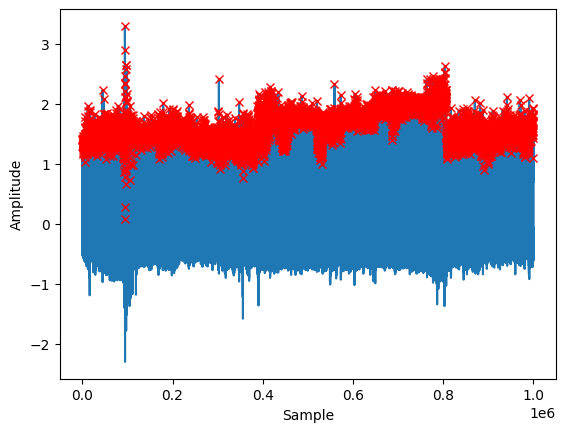

[    37    152    266 ... 999785 999885 999990]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


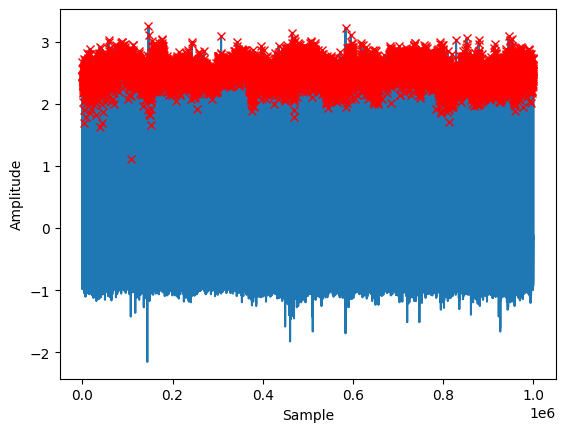

[    93    183    272 ... 999750 999833 999923]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


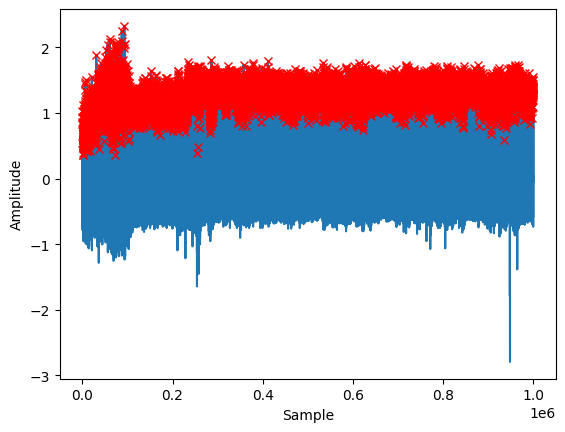

[    56    118    193 ... 999755 999845 999937]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


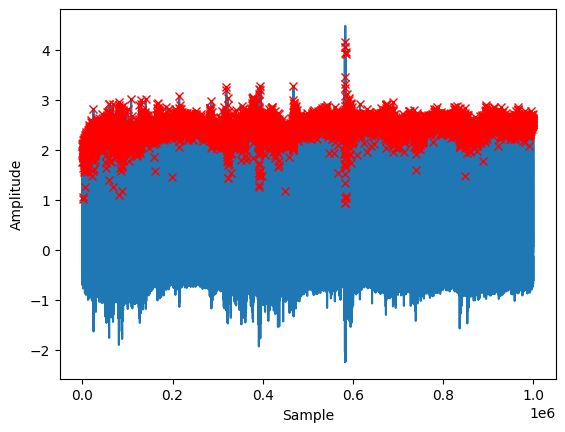

[    79    176    279 ... 999757 999868 999972]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


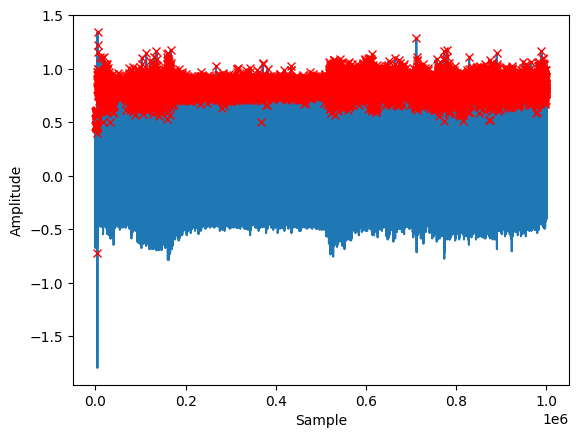

[    31     95    159 ... 999761 999850 999934]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


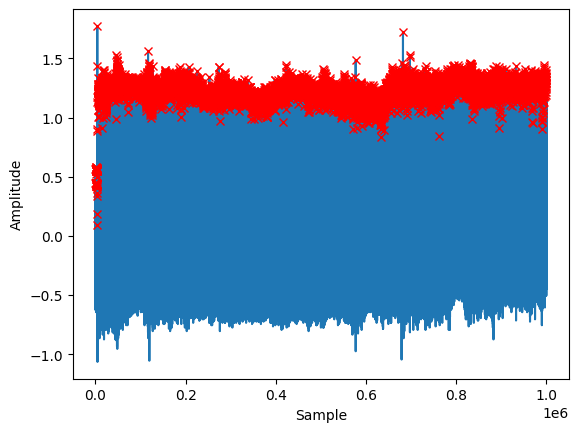

[    70    134    198 ... 999758 999860 999961]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


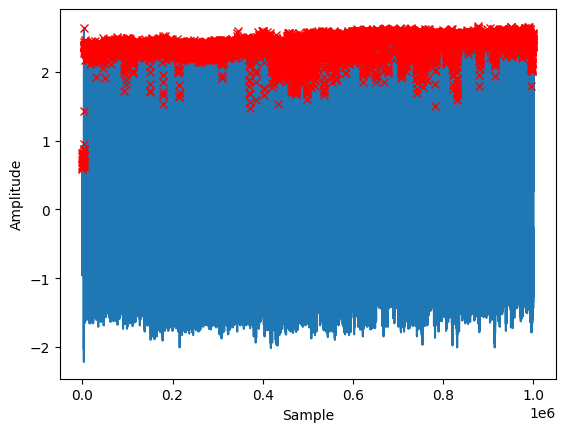

[    57    121    185 ... 999759 999848 999936]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


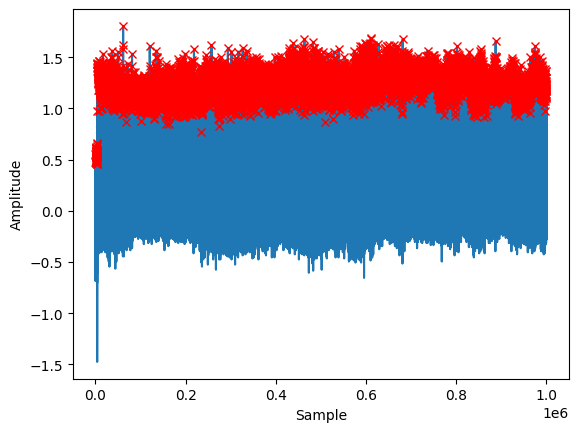

[    16     80    144 ... 999835 999918 999995]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


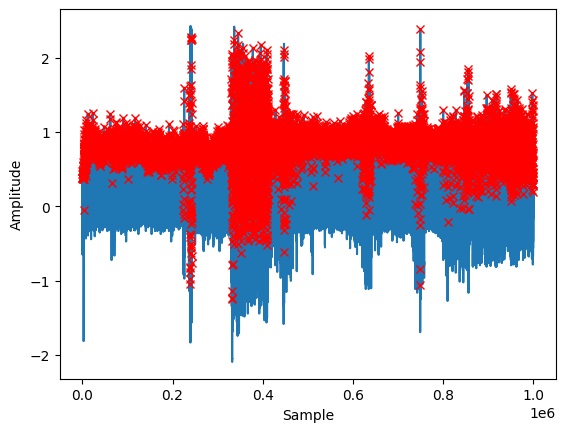

[    44    108    172 ... 999799 999869 999932]
[array([601.5625, 609.375 , 609.375 , ..., 601.5625, 617.1875, 578.125 ]), array([ 984.375 ,  953.125 ,  960.9375, ...,  937.5   ,  984.375 ,
       1007.8125]), array([601.5625, 601.5625, 609.375 , ..., 812.5   , 828.125 , 835.9375]), array([632.8125, 617.1875, 640.625 , ..., 835.9375, 812.5   , 820.3125]), array([625.    , 625.    , 617.1875, ..., 625.    , 609.375 , 617.1875]), array([ 750.    ,  781.25  ,  750.    , ..., 1062.5   ,  945.3125,
        882.8125]), array([828.125 , 835.9375, 789.0625, ..., 687.5   , 773.4375, 804.6875]), array([843.75  , 859.375 , 804.6875, ..., 945.3125, 906.25  , 921.875 ]), array([835.9375, 281.25  , 593.75  , ..., 718.75  , 750.    , 609.375 ]), array([898.4375, 890.625 , 859.375 , ..., 773.4375, 781.25  , 820.3125]), array([703.125 , 695.3125, 726.5625, ..., 640.625 , 648.4375, 703.125 ]), array([484.375 , 585.9375, 523.4375, ..., 765.625 , 703.125 , 718.75  ]), array([757.8125, 804.6875, 804.6875, 

In [93]:
import wfdb
from wfdb.processing import qrs

def get_rr_peaks(all_recordings, lines):

    fs = 128
    rri = []
    corrected = []

    for line in lines:

        path = os.path.join(root_directory, line)
        current_recording = wfdb.rdrecord(path)
        
        # Load an ECG record
        current_recording = wfdb.rdrecord(path, sampto=1000000, channels=[0])

        # Apply QRS detection
        qrs_inds = qrs.xqrs_detect(current_recording.p_signal[:,0], fs=current_recording.fs)

        correct = ecg.correct_rpeaks(signal=current_recording.p_signal[:,0], rpeaks=qrs_inds, sampling_rate=1000.0, tol=0.05)

        corrected.append(correct)



        # Plot the ECG signal with R-peaks marked
        plt.plot(current_recording.p_signal[:,0])
        plt.plot(correct, current_recording.p_signal[correct,0], 'rx')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.show()

        # atenção aos labels usados

        print(qrs_inds)
        rri.append(1000*np.diff(qrs_inds)/current_recording.fs)

    return rri

rr_intervals = get_rr_peaks(nsr_signals, split_lines)
print(rr_intervals)

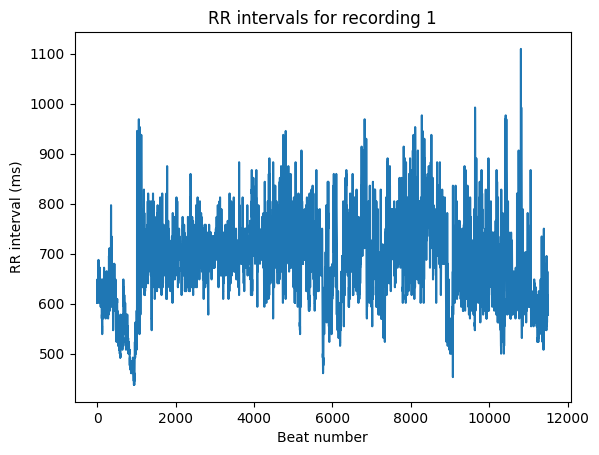

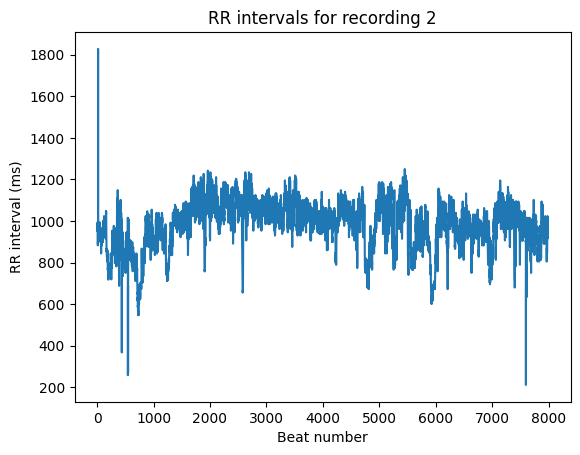

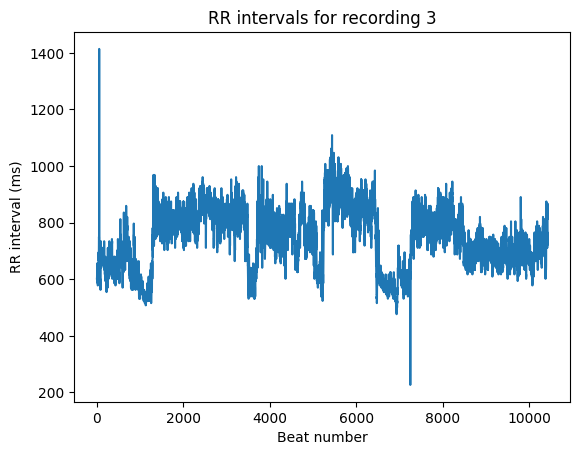

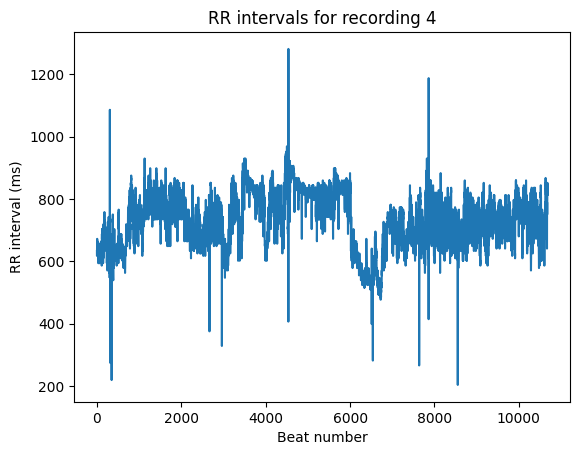

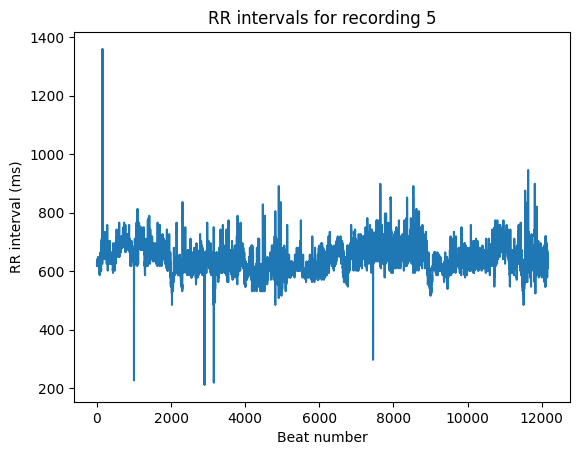

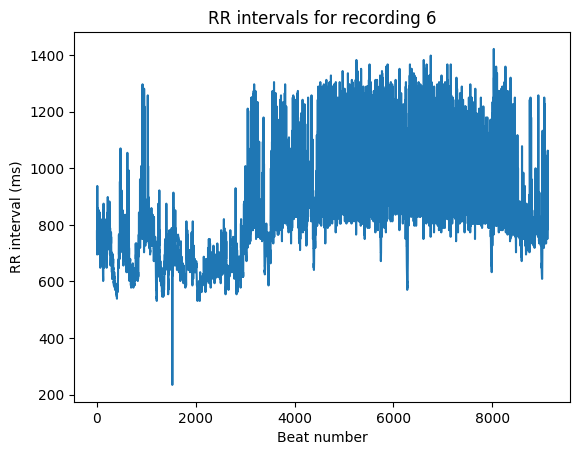

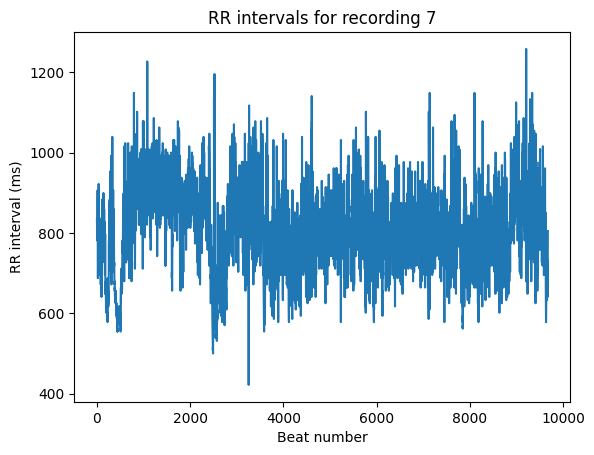

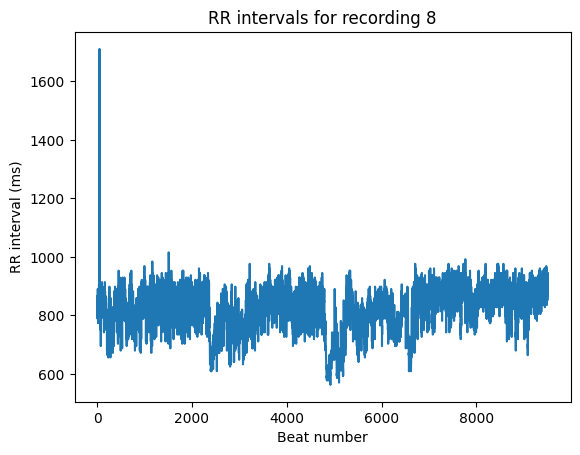

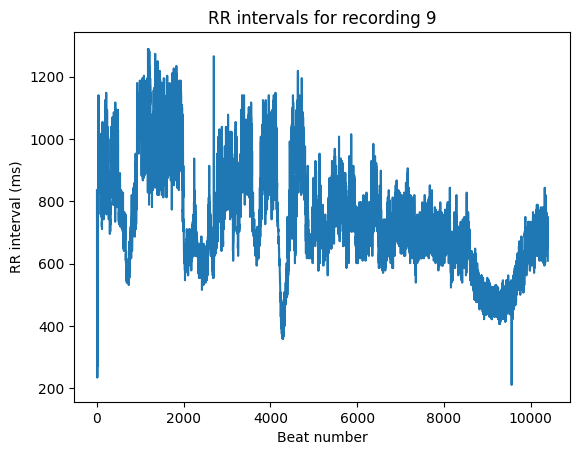

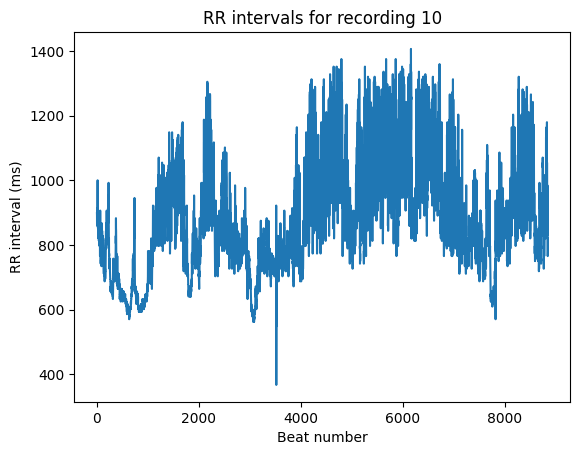

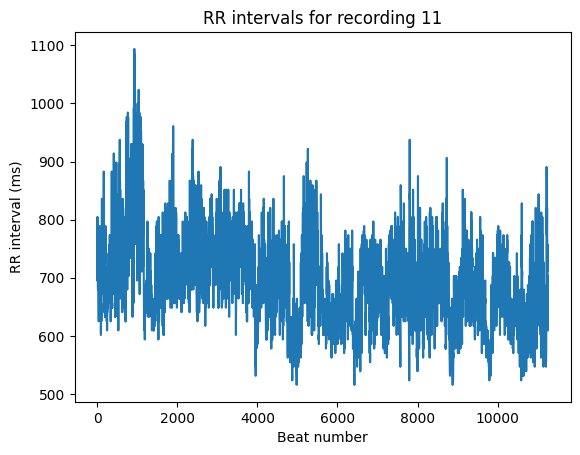

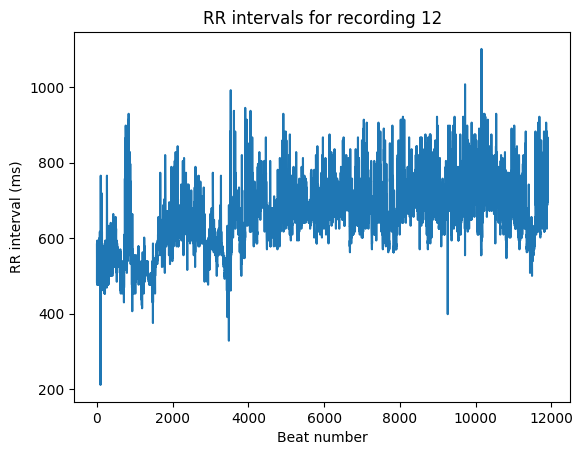

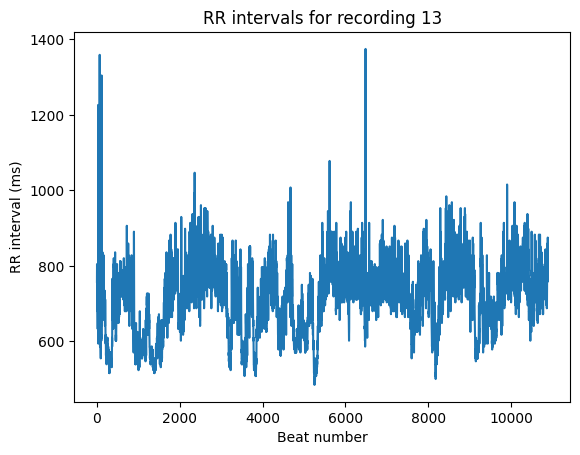

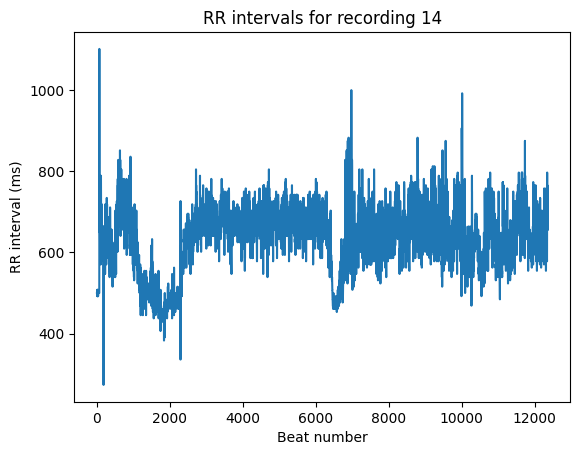

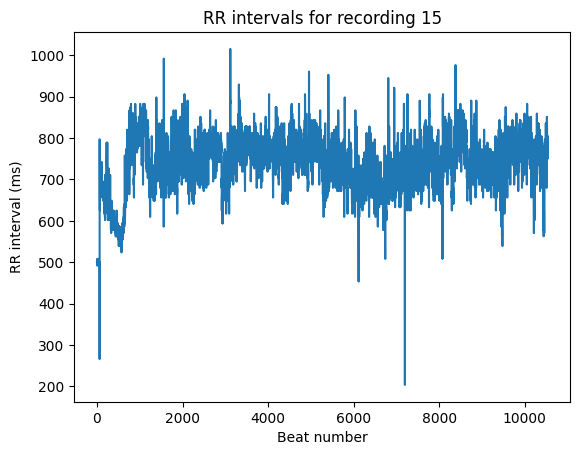

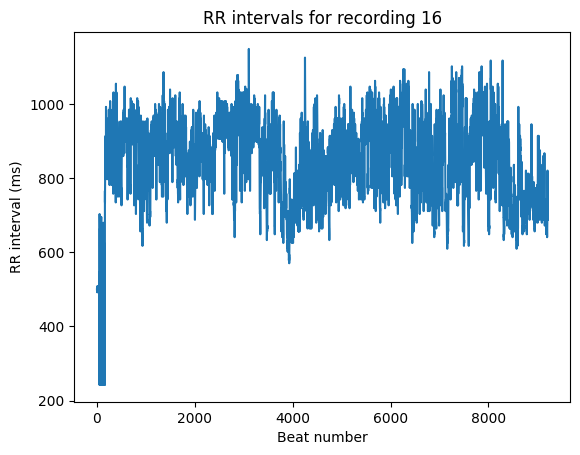

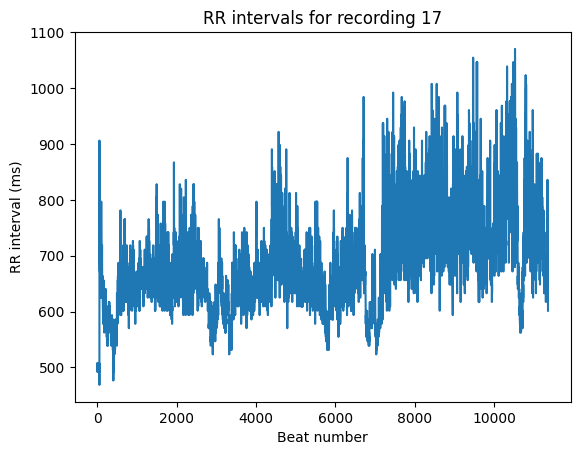

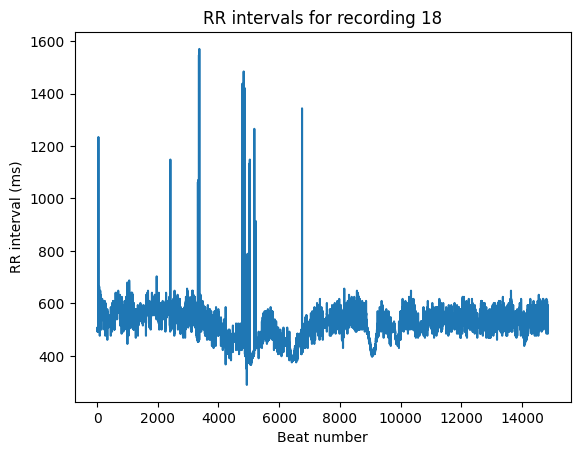

In [94]:
for i in range(len(rr_intervals)):
    plt.figure()
    plt.plot(rr_intervals[i])
    plt.xlabel('Beat number')
    plt.ylabel('RR interval (ms)')
    plt.title('RR intervals for recording ' + str(i+1))
    plt.show()